In [1]:
import math
import matplotlib.pyplot as plt
%matplotlib inline

from keras_pandas.Automater import Automater
import pandas as pd
import keras
import numpy as np

/Users/batuhanyardim/.pyenv/versions/3.6.1/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/Users/batuhanyardim/.pyenv/versions/3.6.1/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [2]:
data = pd.read_csv('./uk-road/Kaagle_Upload.csv', low_memory=False)

In [3]:
data.head()

,accident_index,vehicle_reference,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_location-restricted_lane,junction_location,skidding_and_overturning,hit_object_in_carriageway,vehicle_leaving_carriageway,...,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile
0,201506E098757,2,9,0,18,0,8,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,201506E098766,1,9,0,9,0,8,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,201506E098766,2,9,0,18,0,8,0,0,0,...,8.0,3.0,0.0,0.0,0.0,0.0,0.0,9.0,1.0,3.0
3,201506E098777,1,20,0,4,0,0,0,0,0,...,6.0,3.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
4,201506E098780,1,9,0,15,0,1,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
data.tail()

,accident_index,vehicle_reference,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_location-restricted_lane,junction_location,skidding_and_overturning,hit_object_in_carriageway,vehicle_leaving_carriageway,...,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile
285326,2015984141415,9,9,0,18,0,0,1,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
285327,2015984141415,10,9,0,18,0,0,1,0,1,...,4.0,3.0,0.0,0.0,0.0,0.0,0.0,9.0,2.0,5.0
285328,2015984141415,11,9,0,18,0,0,1,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
285329,2015984141415,12,9,0,18,0,0,1,0,0,...,6.0,3.0,0.0,0.0,0.0,0.0,0.0,9.0,3.0,-1.0
285330,2015984141415,13,9,0,18,0,0,0,0,5,...,4.0,3.0,0.0,0.0,0.0,0.0,0.0,9.0,1.0,4.0


In [5]:
data.dtypes

accident_index                                       object
vehicle_reference                                     int64
vehicle_type                                          int64
towing_and_articulation                               int64
vehicle_manoeuvre                                     int64
vehicle_location-restricted_lane                      int64
junction_location                                     int64
skidding_and_overturning                              int64
hit_object_in_carriageway                             int64
vehicle_leaving_carriageway                           int64
hit_object_off_carriageway                            int64
1st_point_of_impact                                   int64
was_vehicle_left_hand_drive?                          int64
journey_purpose_of_driver                             int64
sex_of_driver                                         int64
age_of_driver                                         int64
age_band_of_driver                      

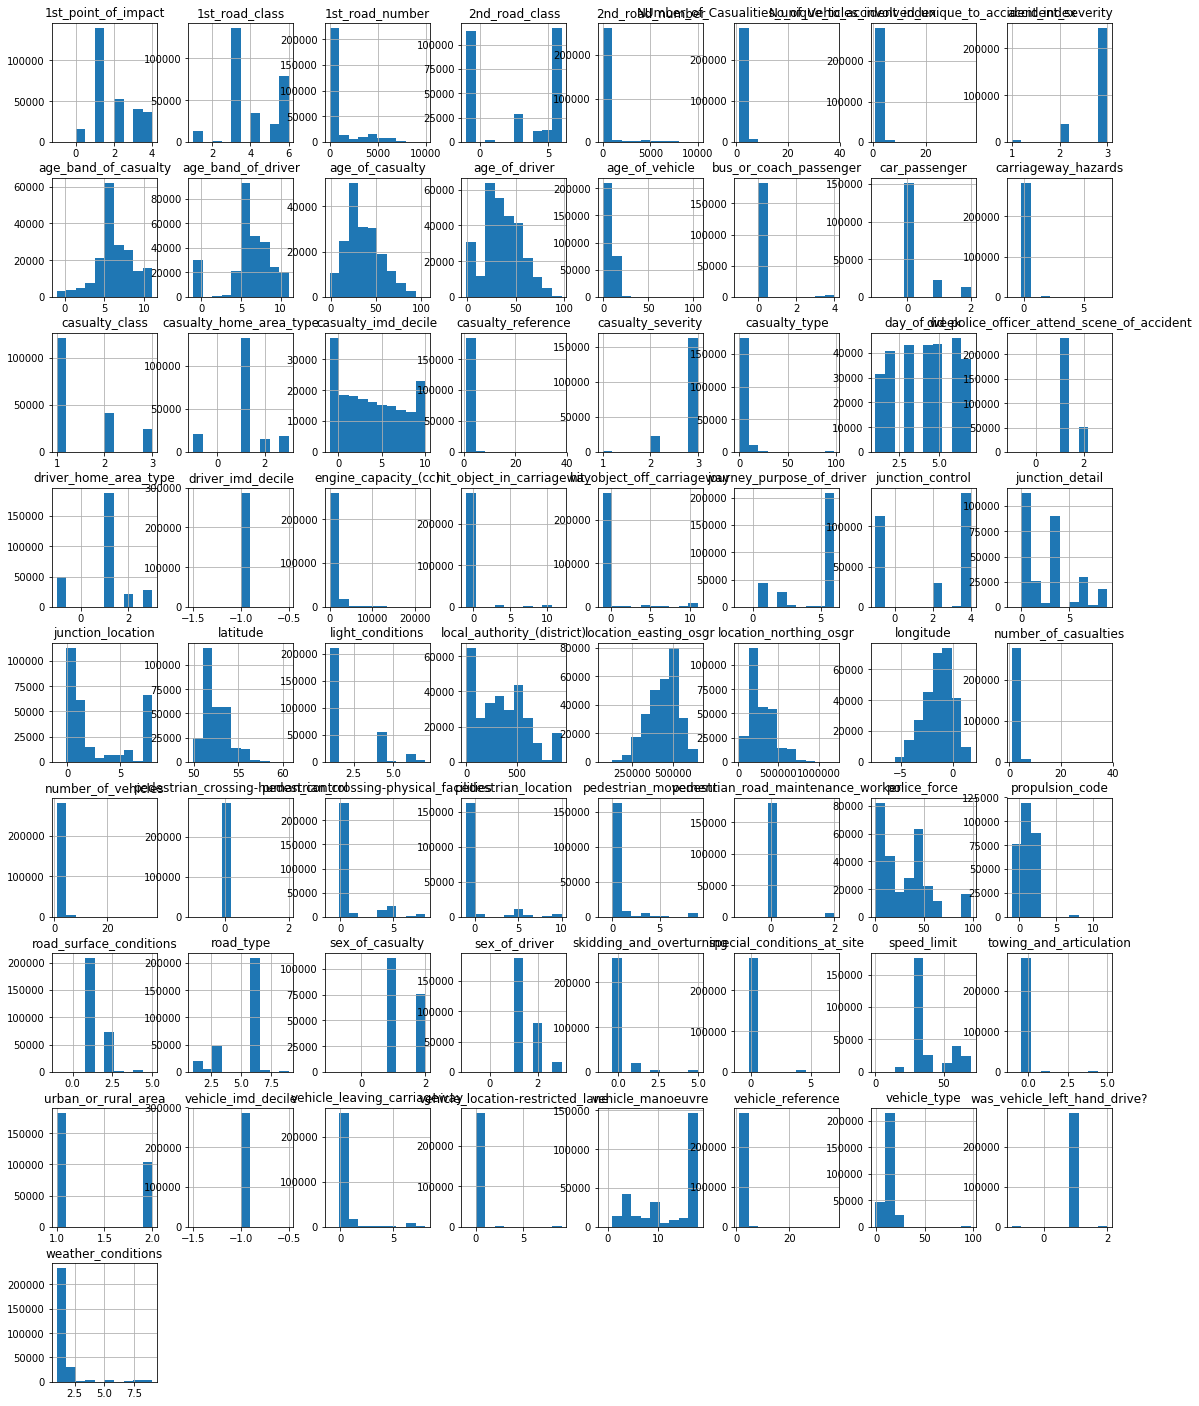

In [6]:
data.hist(figsize=(19,25));

## Select features / one hot encoding

In [7]:
# func that returns a dummified DataFrame of significant dummies in a given column
def get_masked_dummies(dummy_col, labels):

    # removes the bind
    dummy_col = dummy_col.copy()

    dummies = pd.get_dummies(dummy_col)
    
    return dummies[labels]

In [8]:
d_sex = get_masked_dummies(data['sex_of_driver'], [1, 2]);
data['vehicle_old'] = (data['age_of_vehicle'] > 5) * 1.0

# log of ages
ages = data['age_of_driver']
average_age = ages[ages > 0].mean()
print('Avg. age: ', average_age)
data.loc[:, 'age_of_driver_2'] = data['age_of_driver'].copy()
data.loc[data['age_of_driver'] <= 0, 'age_of_driver_2'] = average_age
data['log_age_driver'] = np.log(np.max(data['age_of_driver_2']))

Avg. age:  40.03717658682705


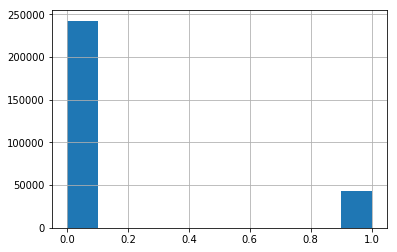

In [9]:
# prepare predictor
data.loc[:, 'y'] = (np.logical_or(data.loc[:, 'accident_severity'] == 1,
                                  data.loc[:, 'accident_severity'] == 2)) * 1.0

data['y'].hist()

In [32]:
categorical_vars = ['sex_of_driver', 'day_of_week', 'vehicle_type', 'weather_conditions', 'light_conditions', 
                   'road_surface_conditions', 'road_type', 'urban_or_rural_area',
                   'junction_detail', 'junction_control']
numerical_vars = ['log_age_driver', 'speed_limit']
indicator_vars = ['vehicle_old']

predicted_var = 'y'

data['y'].values.shape

(285331,)

In [37]:
def form_np_dataset(data, categorical_vars, numerical_vars, indicator_vars, label):
    X = None
    for c in categorical_vars:
        x = pd.get_dummies(data[c])
        
        if X is None:
            X = x
        else:
            X = np.hstack((X, x))
            
    for n in numerical_vars + indicator_vars:
        X = np.hstack((X, data[n].values.reshape((data[n].values.size, -1))))
    
    y = data[label].values
    
    return X, y

In [38]:
X, y = form_np_dataset(data, categorical_vars, numerical_vars, indicator_vars, predicted_var)

In [42]:
print(X.shape)
print(y.shape)

(285331, 78)
(285331,)


## Separate training/test dataset

In [44]:
N = y.size

train_N = math.ceil(N * 0.8)
p = np.random.permutation(N)
X = X[p]
y = y[p]

X_train = X[:train_N]
y_train = y[:train_N]

X_test = X[train_N:]
y_test = y[train_N:]

In [46]:
print('test set:', y_test.size)
print('train set:', y_train.size)

test set: 57066
train set: 228265


## Save data for later use

In [47]:
np.savez('./datasets/train_uk.npz', X=X_train, y=y_train)
np.savez('./datasets/test_uk.npz', X=X_test, y=y_test)